In [1]:
# !pip install opencv-python
# !pip install ipykernel

In [1]:
import cv2 as cv

In [3]:
image = cv.imread("../data/nangaparbat.jpg")
if image is None:
   print('Could not open or find the image!')
else:
  print('Image loaded successfully!')

Image loaded successfully!


In [4]:
# this wouldnot work in a codespace environment due to no GUI support
# Uncomment the following lines to display the image in a local environment

# cv.imshow('Nanga Parbat', image)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [5]:
new_image = image + 30
cv.imwrite('../data/output.jpg', new_image) 

True

For Video

In [ ]:
# Reading and displaying a video file
# Uncomment the following lines to run in a local environment with GUI support
video = cv.VideoCapture('/path')
while True:
   ret,frame = video.read()
   if not ret:
      break
   cv.imshow('Video Frame', frame)
   if cv.waitKey(1) & 0xFF == ord('q'):
      break    
video.release()
cv.destroyAllWindows()

In [ ]:
# Writing a video file
# Uncomment the following lines to run in a local environment with GUI support
video = cv.VideoCapture('/path')
fourcc = cv.VideoWriter_fourcc(*'mp4v')

width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

out = cv.VideoWriter('output_video.mp4', fourcc, 30.0, (width, height))

while True:
   ret, frame = video.read()
   if not ret:
      break
   out.write(frame)
  
  
out.release()
video.release()
cv.destroyAllWindows()

# Exploring Color Models in image Processing

In [2]:
bgr_image = cv.imread("../data/nangaparbat.jpg")

In [ ]:
#Convert to grayscale
gray_image = cv.cvtColor(bgr_image, cv.COLOR_BGR2GRAY)
cv.imwrite('../data/gray_image.jpg', gray_image)

True

In [4]:
# Converting BGR to HSV
hsv_image = cv.cvtColor(bgr_image, cv.COLOR_BGR2HSV)
cv.imwrite("../data/hsv_image.jpg", hsv_image)

True

### Color Tresholding
##### Color tresholding is a technique used in image processing to isolate specific colors in an image. It involves defining a range of color values (usually in the RGB or HSV color space) and creating a mask that highlights pixels within that range. This is useful for tasks like object detection, segmentation, and tracking.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

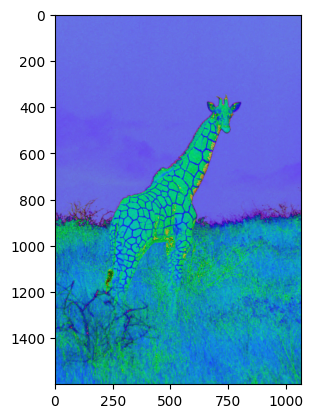

In [3]:
new_image = cv.imread("../data/giraffe-Kenya.png")
image_rgb = cv.cvtColor(new_image,cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(new_image,cv.COLOR_BGR2HSV)
plt.imshow(image_hsv)

In [ ]:
# Lower and uppper bounds for color detection, in HSV space
lower_bound = np.array([0, 0, 100])
upper_bound = np.array([30, 80, 255]) 

In [8]:
mask = cv.inRange(image_hsv, lower_bound, upper_bound)

In [19]:
black_hsv = np.uint8([[[120, 255, 0]]])
black_bgr = cv.cvtColor(black_hsv, cv.COLOR_HSV2BGR)[0][0]
image_result = new_image.copy()
image_result[mask != 0] = black_bgr

In [12]:
image_result_rgb = cv.cvtColor(image_result, cv.COLOR_BGR2RGB)

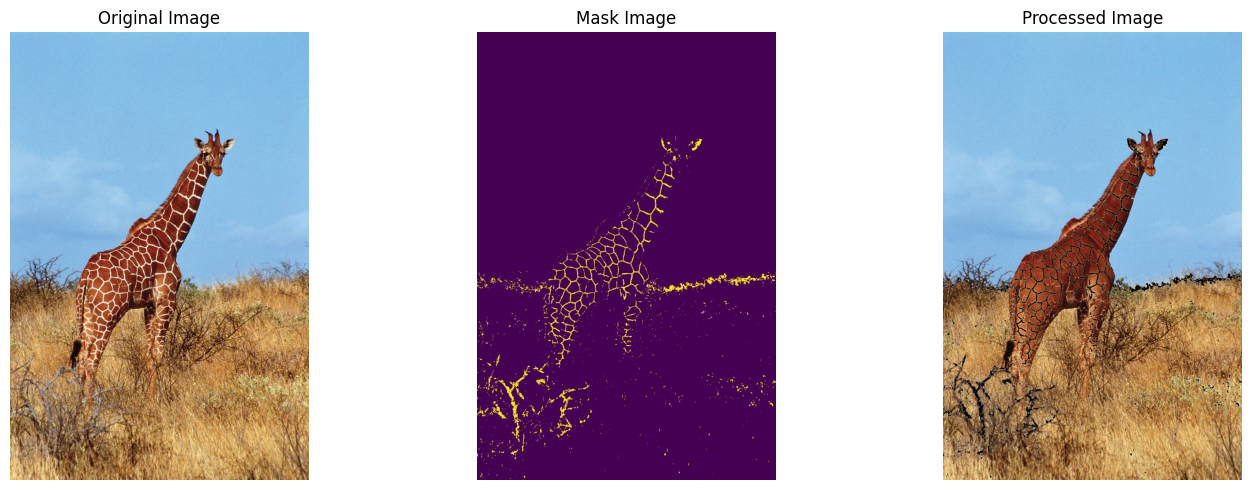

In [15]:
# Plotting the original and processed images
fig,axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].imshow(image_rgb)
axis[0].set_title('Original Image')
axis[0].axis('off')

axis[1].imshow(mask)
axis[1].set_title('Mask Image')
axis[1].axis('off')

axis[2].imshow(image_result_rgb)
axis[2].set_title('Processed Image')
axis[2].axis('off')


plt.tight_layout()
plt.show()

#### Image Resizing, Scaling and interpolation

Original image shape (1600, 1067, 3)
resizedImage shape (400, 400, 3)


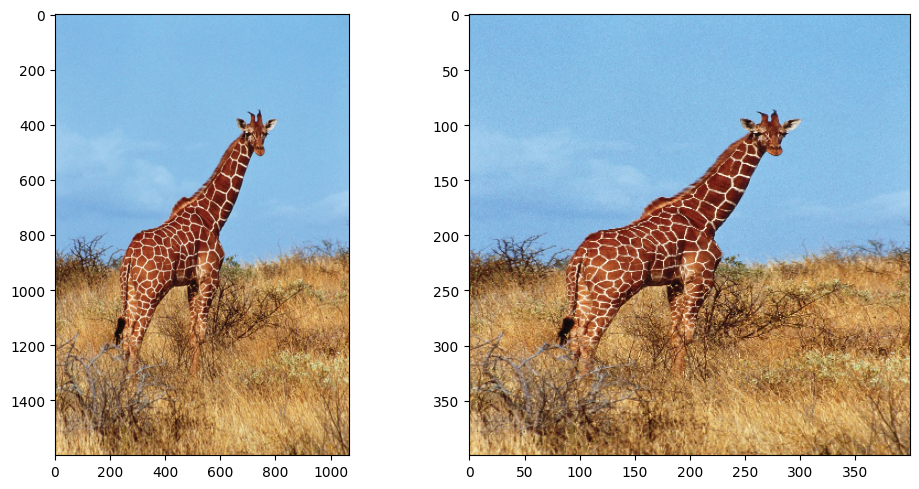

In [33]:
# Image resizing
print('Original image shape',image_rgb.shape)
new_height , new_width = 400, 400
resized_image = cv.resize(image_rgb, (new_width, new_height))
print('resizedImage shape', resized_image.shape)
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(image_rgb)
axis[1].imshow(resized_image)
plt.tight_layout()
plt.show()

Scaled image shape (800, 533, 3)


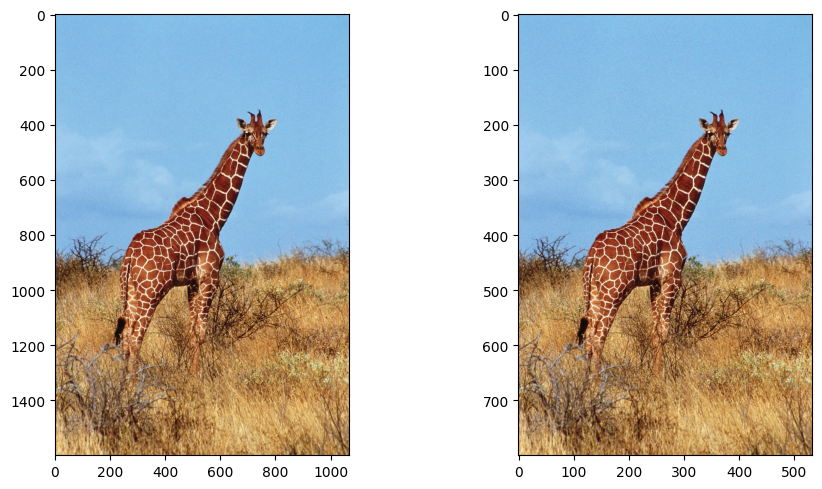

In [39]:
# Image Scaling
scale_percent = 50  # percent of original size
scaled_width = int(image_rgb.shape[1] * scale_percent / 100 )
scaled_height = int(image_rgb.shape[0] * scale_percent / 100)

scaled_image = cv.resize(image_rgb, (scaled_width, scaled_height), interpolation=cv.INTER_LANCZOS4)
print('Scaled image shape', scaled_image.shape)
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(image_rgb)
axis[1].imshow(scaled_image)
plt.tight_layout()
plt.show()